In [ ]:
!python --version

In [ ]:
!pip install pandas

In [ ]:
!pip install tensorflow

In [1]:
import tensorflow as tf

In [ ]:
inputs = tf.keras.layers.Input(shape = (20, 1), name = 'input')
outputs = tf.keras.layers.Dense(units = 10, activation = 'softmax', name = 'output_softmax')(inputs)

model_1 = tf.keras.Model(inputs = inputs, outputs = outputs)
model_1.summary()

In [ ]:
## hidden
Input_size = 20
inputs = tf.keras.layers.Input(shape = Input_size, name = 'input')
hidden1 = tf.keras.layers.Dense(units = 10, activation='relu', name = 'hidden1')(inputs)
outputs = tf.keras.layers.Dense(units = 2, activation = 'softmax', name = 'output')(hidden1)

model_2 = tf.keras.Model(inputs = inputs, outputs = outputs)
model_2.summary()

In [ ]:
# dropout
INPUT_SIZE = 20
inputs = tf.keras.layers.Input(shape = INPUT_SIZE, name = 'input')
dropout = tf.keras.layers.Dropout(rate = 0.2, name = 'dropout')(inputs)
hidden = tf.keras.layers.Dense(units = 10, activation = 'relu', name = 'hidden')(dropout)
outputs = tf.keras.layers.Dense(units = 2, activation = 'softmax', name = 'output')(hidden)

model_3 = tf.keras.Model(inputs = inputs, outputs =outputs)
model_3.summary()

In [ ]:
# ID convolution l
INPUT_SIZE = (20, 1)
inputs = tf.keras.Input(shape = INPUT_SIZE)
conv = tf.keras.layers.Conv1D(filters = 10, kernel_size = 3, padding = 'same', activation = 'relu')(inputs)
model4 = tf.keras.Model(inputs = inputs, outputs = conv)
model4.summary()

In [ ]:
inputs = tf.keras.layers.Input(shape = (20, 1), name = 'input')
dropout = tf.keras.layers.Dropout(rate = 0.2, name = 'dropout')(inputs)
conv = tf.keras.layers.Conv1D(filters = 10,
                             kernel_size = 3,
                             padding = 'same', # 원래 shape 개수와 같게 만들어줌
                             activation = 'relu',
                             name = 'Conv')(dropout)
max_pool = tf.keras.layers.MaxPool1D(pool_size = 3)(conv)
flatten = tf.keras.layers.Flatten()(max_pool)
hidden = tf.keras.layers.Dense(units = 50, activation = 'relu', name = 'hidden')(flatten)
outputs = tf.keras.layers.Dense(units = 10, activation = 'softmax')(hidden)

model_functionAPI = tf.keras.Model(inputs = inputs, outputs = outputs, name = 'functionAPI')
model_functionAPI.summary()

# kernel 1 => 파라미터 1개를 가지기 때문에, kernel이 3인 경우 파라미터는 3개가 된다.
# 10 (filter의 개수) * 3 (kernel 개수) + 10 (filter 1개 당 bias 파라미터 1개 -> filter가 10개이므로, 필요 bias 파라미터 = 10개)

# Model 구축

### Sequential API

In [ ]:
model = tf.keras.Sequential(name = 'Sequential_API')
model.add(tf.keras.layers.Input(shape = (32, ), name = 'input'))
model.add(tf.keras.layers.Dense(units = 64, activation = 'relu', name = 'Dense1'))
model.add(tf.keras.layers.Dense(units = 64, activation = 'relu', name = 'Dense2'))
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax', name ='Outputs'))

model.summary()

### Functional API

In [ ]:
inputs = tf.keras.layers.Input(shape = (32, ), name = 'input')
Dense1 = tf.keras.layers.Dense(units = 64, activation = 'relu', name = 'dense1')(inputs)
Dense2 = tf.keras.layers.Dense(units = 64, activation = 'relu', name = 'dense2')(Dense1)
outputs = tf.keras.layers.Dense(units = 10, activation = 'softmax', name = 'outputs')(Dense2)

model.summary()

### Custom layers

In [ ]:
class Customlayer(tf.keras.layers.Layer) :
    def __init__(self, hidden1, hidden2, output_layer) :
        super(Customlayer, self).__init__()
        self.hidden1 = hidden1
        self.hidden2 = hidden2
        self.output_layer = output_layer

    def build(self, inputs) :
        self.dense_layer1 = tf.keras.layers.Dense(units = self.hidden1, activation = 'relu', name = 'Dense1')
        self.dense_layer2 = tf.keras.layers.Dense(units = self.hidden2, activation = 'relu', name = 'Dense2')
        self.output_layers = tf.keras.layers.Dense(units = self.output_layer, activation = 'softmax', name = 'output')

    def call(self, inputs) :
        x = self.dense_layer1(inputs)
        x = self.dense_layer2(x)

        return self.output_layers(x)

In [ ]:
model = tf.keras.Sequential(name = 'Custom_layer')
model.add(tf.keras.layers.Input(shape = (32, )))
model.add(Customlayer(64, 64, 10))

model.summary()

### Subclassing

In [ ]:
class MyModel(tf.keras.Model) :
    def __init__(self, hidden1, hidden2, output_layers) :
        super(MyModel, self).__init__(name = 'MyModel')
        self.dense1 = tf.keras.layers.Dense(units = hidden1, activation = 'relu', name = 'dense1')
        self.dense2 = tf.keras.layers.Dense(units = hidden2, activation = 'relu', name = 'dense2')
        self.outputlayer = tf.keras.layers.Dense(units = output_layers, activation='softmax', name = 'output_layer')
        
    def call(self, inputs) :
        x = self.dense1(inputs)
        x = self.dense2(x)
        
        return self.output_layer(x)

In [ ]:
model_sub = MyModel(64,64,10)

# model_sub.summary()

model_sub.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model_sub.fit(train_input, train_target, epochs = 20, batch_size = 64)

# 데이터 실습

In [6]:
import numpy as np

In [7]:
dataset = np.loadtxt('./pima-indians-diabetes.csv', delimiter = ',')
print(dataset.shape)

(768, 9)


In [8]:
X = dataset[:, 0 : 8]
Y = dataset[:, -1]

print(X)
print(Y)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 

### Sequential

In [ ]:
model = tf.keras.Sequential(name = 'Sequential')
model.add(tf.keras.layers.Input(shape = (8, ), name = 'input'))
model.add(tf.keras.layers.Dense(units = 12, activation = 'relu', name = 'dense1'))
model.add(tf.keras.layers.Dense(units = 8, activation = 'relu', name = 'dense2'))
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid', name = 'output'))

model.summary()

In [ ]:
model.compile(loss = 'binary_crossentropy', 
             optimizer = 'adam', metrics = ['acc'])
model.fit(X, Y, epochs = 100, batch_size = 70)

### functional API

In [ ]:
inputs = tf.keras.layers.Input(shape = (8, ), name = 'input')
dense1 = tf.keras.layers.Dense(units = 12, activation = 'relu', name = 'dense1')(inputs)
dense2 = tf.keras.layers.Dense(units = 8, activation = 'relu', name = 'dense2')(dense1)
outputs = tf.keras.layers.Dense(units = 1, activation = 'sigmoid', name = 'output')(dense2)

In [ ]:
model.compile(loss = 'binary_crossentropy', 
             optimizer = 'adam', metrics = ['acc'])
model.fit(X, Y, epochs = 100, batch_size = 70)

### Subclassing

In [24]:
class Mymodel(tf.keras.Model) :
    def __init__(self, hidden1, hidden2, outputs) :
        super(Mymodel, self).__init__()
        self.dense1 = tf.keras.layers.Dense(units = hidden1, activation = tf.nn.relu, name = 'dense1')
        self.dense2 = tf.keras.layers.Dense(units = hidden2, activation = tf.nn.relu, name = 'dense2')
        self.outputs = tf.keras.layers.Dense(units = outputs, activation = tf.nn.sigmoid, name = 'output')
        
    def call(self, inputs) :
        x = self.dense1(inputs)
        x = self.dense2(x)
        
        return self.outputs(x)

model_sub = Mymodel(12, 8, 1)

In [25]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = './model_save/{epoch:2d}_{val_loss:.4f}.hdf5', monitor = 'var_loss',
                                               verbose = 1, save_best_only = True, save_weights_only = True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)

In [26]:
model_sub.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['acc'])
history = model_sub.fit(X, Y, epochs = 100, batch_size = 70, validation_split = 0.2, callbacks = [checkpoint, early_stopping])

Epoch 1/100
9/9 [==============================] - 1s 31ms/step - loss: 6.6035 - acc: 0.6547 - val_loss: 4.9366 - val_acc: 0.6429
Epoch 2/100
9/9 [==============================] - 0s 9ms/step - loss: 5.4071 - acc: 0.5782 - val_loss: 4.5167 - val_acc: 0.5584
Epoch 3/100
9/9 [==============================] - 0s 7ms/step - loss: 4.9148 - acc: 0.5342 - val_loss: 3.9847 - val_acc: 0.5779
Epoch 4/100
9/9 [==============================] - 0s 8ms/step - loss: 4.3022 - acc: 0.5945 - val_loss: 3.5581 - val_acc: 0.6169
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 3.8440 - acc: 0.6515 - val_loss: 3.2201 - val_acc: 0.6429
Epoch 6/100
9/9 [==============================] - 0s 7ms/step - loss: 3.4353 - acc: 0.6466 - val_loss: 2.8724 - val_acc: 0.6364
Epoch 7/100
9/9 [==============================] - 0s 7ms/step - loss: 3.0217 - acc: 0.6319 - val_loss: 2.5127 - val_acc: 0.6299
Epoch 8/100
9/9 [==============================] - 0s 7ms/step - loss: 2.5911 - acc: 0.6189 - va

9/9 [==============================] - 0s 7ms/step - loss: 0.5891 - acc: 0.6661 - val_loss: 0.6043 - val_acc: 0.6688
Epoch 41/100
9/9 [==============================] - 0s 7ms/step - loss: 0.5877 - acc: 0.6808 - val_loss: 0.6094 - val_acc: 0.7013
Epoch 42/100
9/9 [==============================] - 0s 7ms/step - loss: 0.5853 - acc: 0.6743 - val_loss: 0.6054 - val_acc: 0.6818
Epoch 43/100
9/9 [==============================] - 0s 8ms/step - loss: 0.5853 - acc: 0.6775 - val_loss: 0.6191 - val_acc: 0.6104
Epoch 44/100
9/9 [==============================] - 0s 8ms/step - loss: 0.5795 - acc: 0.6792 - val_loss: 0.6041 - val_acc: 0.6688
Epoch 45/100
9/9 [==============================] - 0s 8ms/step - loss: 0.5789 - acc: 0.6726 - val_loss: 0.6118 - val_acc: 0.6688
Epoch 46/100
9/9 [==============================] - 0s 8ms/step - loss: 0.5760 - acc: 0.6759 - val_loss: 0.6073 - val_acc: 0.6753
Epoch 47/100
9/9 [==============================] - 0s 8ms/step - loss: 0.5783 - acc: 0.6840 - val_loss

In [27]:
np.max(history.history['val_acc'])

0.701298713684082

In [20]:
!pip install matplotlib

  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)


In [28]:
import matplotlib.pyplot as plt

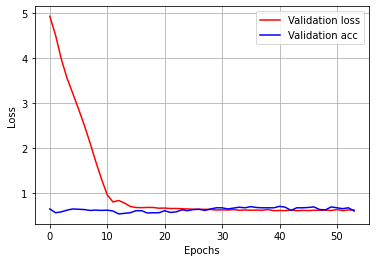

In [29]:
plt.plot(history.history['val_loss'], '-r', label = 'Validation loss')
plt.plot(history.history['val_acc'], '-b', label = 'Validation acc')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()